In [2]:
import tensorflow as tf

c:\users\manzlee\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\manzlee\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\manzlee\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\manz

In [3]:
pholder_1 = tf.placeholder(dtype=tf.float32)
pholder_2 = tf.placeholder(dtype=tf.float32)

multi1 = pholder_1*3
multi2 = pholder_1*pholder_2

session=tf.Session()
print(session.run(multi2, {pholder_1:4.0, pholder_2:[2.0, 5.0]}))

[ 8. 20.]


In [4]:
#variable nodes
var_node1=tf.Variable([4.034], dtype=tf.float32)
cannode1= tf.constant([10.0], dtype=tf.float32)

init= tf.global_variables_initializer()
session=tf.Session()
session.run(init)

session.run(var_node1.assign([12.509]))
print(session.run(var_node1))


[12.509]


In [5]:
#linear regression models

#y=Wx+B
#x=[1,2,3,4]
#y=[0,-1,-2,-3]

W=tf.Variable([-0.5], dtype=tf.float32)
b=tf.Variable([-1.5], dtype=tf.float32)

x=tf.placeholder(dtype=tf.float32)
y=tf.placeholder(dtype=tf.float32)

linear_model=W*x+b

x_train=[1,2,3,4]
y_train=[0,-1,-2,-3]

session = tf.Session()
init=tf.global_variables_initializer()
session.run(init)
print(session.run(linear_model,{x: x_train}))



[-2.  -2.5 -3.  -3.5]


In [6]:
#linear regression models
#y=Wx+B
#x=[1,2,3,4]
#y=[0,-1,-2,-3]

W=tf.Variable([-0.5], dtype=tf.float32)
b=tf.Variable([.5], dtype=tf.float32)

x=tf.placeholder(dtype=tf.float32)
y=tf.placeholder(dtype=tf.float32)

linear_model=W*x+b

#training the model minimizing loss as much as possible
x_train=[1,2,3,4]
y_train=[0,-1,-2,-3]

loss = tf.reduce_sum(tf.square(linear_model-y))
optimizer = tf.train.GradientDescentOptimizer(0.01) #train the model at a learning rate of .01
train = optimizer.minimize(loss)

session = tf.Session()
init=tf.global_variables_initializer()
session.run(init)

for i in range(1000):
    session.run(train, {x:x_train, y:y_train})
    
#print(session.run([W, b]))
new_W, new_b, new_loss = session.run([W, b, loss], {x:x_train, y:y_train})
#print("New W: %s"%new_W)
#print("New b: %s"%new_b)
#print("New loss: %s"%new_loss)
#testing accuracy
print(session.run(linear_model, {x:[10,14,24,30]}))

[ -8.999992 -12.999988 -22.999977 -28.99997 ]


In [7]:
from PIL import Image

from matplotlib import pyplot
from keras.datasets import cifar10

#cat_path=''
#cat_img = Image.open(cat_path)
#cat_img_show()

#display_img_prev = input('Enter Image Pathname: ')
#display_img = Image.open(display_img_prev)
#display_img.show()

#cifar10 order of labels
labels=['airplane','automobile', 'birds', 'cat',  'deer', 'frog', 'horse', 'dog', 'ship', 'truck']

from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

"""
index=int(input('Enter image index: '))
display_image=X_train[index]
display_label=y_train[index][0]

from matplotlib import pyplot as plt
final_image = Image.fromarray(display_image)

plt.imshow(display_image)
#red,green,blue = final_image.split()
#plt.imshow(red,cmap="Reds")
plt.show()

print(labels[display_label])


# example of loading the cifar10 dataset

# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(trainX[i])
# show the figure
plt.show()
"""

from keras.utils import np_utils
new_X_train = X_train.astype('float32')
new_X_test = X_test.astype('float32')
new_X_train /= 255
new_X_test /= 255
new_Y_train = np_utils.to_categorical(y_train)
new_Y_test = np_utils.to_categorical(y_test)


from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.constraints import maxnorm

model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(32,32,3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])
model.fit(new_X_train, new_Y_train, epochs=1, batch_size=32)#epochs=1takes less time

import h5py
model.save('Train_model.h5')


Epoch 1/1
   64/50000 [..............................] - ETA: 8:54:10 - loss: 2.3252 - acc: 0.1562 

c:\users\manzlee\appdata\local\programs\python\python36\lib\site-packages\keras\callbacks.py:119: UserWarning: Method on_batch_end() is slow compared to the batch update (0.476552). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 676s 14ms/step - loss: 1.9030 - acc: 0.3161


[-23.         -17.44444444 -11.88888889  -6.33333333  -0.77777778
   4.77777778  10.33333333  15.88888889  21.44444444  27.        ]


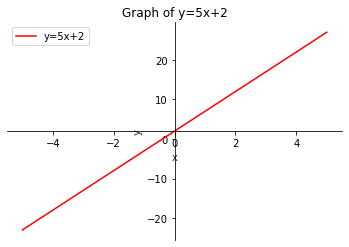

In [16]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-5,5,10)
y = 5*x+2
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(x, y, '-r', label='y=5x+2')
plt.title('Graph of y=5x+2')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
#plt.grid()
plt.show()


In [ ]:
from PIL import Image
import numpy as np
from keras.models import load_model
from keras.preprocessing import image

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

model = load_model('Train_model.h5')

input_path = input('Enter image file pathname: ')
input_image = Image.open(input_path)
input_image = input_image.resize((32, 32), resample=Image.LANCZOS)

"""image_array = np.array(input_image)
image_array = image_array.astype('float32')
image_array /= 255.0
"""

image_array=np.array(input_image)
image_array = image_array.astype('float32')
image_array /= 255
image_array = image_array.reshape(32, 32, 4)
test_image=np.expand_dims(image_array, axis=0)

answer = model.predict(test_image)
input_image.show()
print(labels[np.argmax(answer)])

